<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

## <center> Synthetic data - Dike model <center> 

--------------------------------------------------------------------------------------------------------------------

In [1]:
################ python internal packages ###############
import re 
import numpy as np
import pylab as py
import pandas as pd
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
#########################################################

In [2]:
################### import external packages #################
from modules.sphere import sphere_gz
from modules.plots import rectangle
##############################################################

## <center> Step # 01: Read synthetic data and the dike model info <center>

In [3]:
# read data file using pandas package:
data = pd.read_csv('Synthetic/synthetic_data.txt', sep = ' ')
dike = pd.read_csv('Synthetic/dike_model.txt', sep = ' ')
area = np.array( dike )
area = area[0,0:4] 
print area

[-1000.  1000.  -500.   500.]


In [4]:
# create working arrays from read data:
x  = np.array(data.iloc[:,0] )
y  = np.array(data.iloc[:,1] )
z  = np.array(data.iloc[:,2] )
gz = np.array(data.iloc[:,3] )
# get the correct number of dimensions:
ndata = np.size(x)
nx = np.sqrt(ndata)
# reshape arrays:
xobs  = np.array( np.split(x, nx) )
yobs  = np.array( np.split(y, nx) )
zobs  = np.array( np.split(z, nx) )
gz_real = np.array( np.split(gz,nx) )

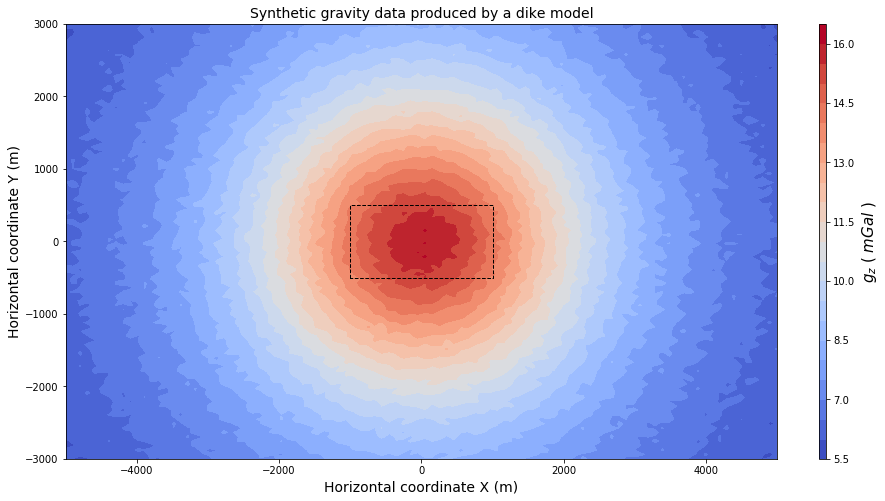

In [5]:
# Ploting the data to see if it's ok so far:
plt.close('all')
fig = plt.figure(figsize=(15,8))
fs = 14
# draw the edges of the dike for better vizualization:
rectangle(area, style='--k', linewidth=1, fill=None, alpha=1., label=None)

# plot the data in colors:
plt.title('Synthetic gravity data produced by a dike model', fontsize = fs)
p = plt.contourf(xobs, yobs, gz_real, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_real), vmax = np.max(gz_real))
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('$g_z$ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()

## Step #02: Let's place a single point mass at the bottom of the interpretive model:

In [6]:
# set the properties of the point mass:
xc = 1100.0
yc = 1100.0
zc = 30000.0
raio = 1000.0
rho = 2600.0
source = ( xc, yc, zc, raio, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(xobs,yobs,zobs,source)
print gz_pred.shape

(100, 100)


## Step #03: Plot data produced by the point mass and compare with the real data:

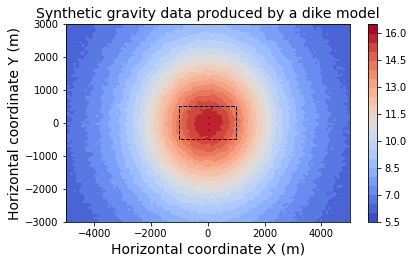

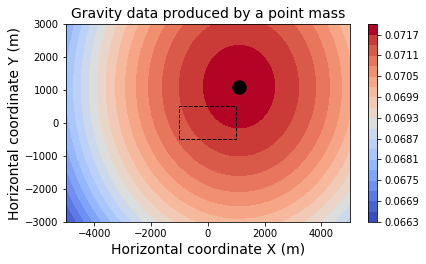

In [48]:
# plot data produced by the point source + the real data:
plt.close('all')
#plt.figure(figsize=(12,8))
py.rcParams['figure.figsize'] = (14.0, 8.0)#Redimensiona a figura
fs = 14
plt.subplot(2, 2, 1)

############################# SUBPLOT WITH THE REAL DATA: ########################################
# draw the edges of the dike for better vizualization:
rectangle(area, style='--k', linewidth=1, fill=None, alpha=1., label=None)

# plot the data in colors:
plt.title('Synthetic gravity data produced by a dike model', fontsize = fs)
p1 = plt.contourf(xobs, yobs, gz_real, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_real), vmax = np.max(gz_real))
cbar = fig.colorbar(p1, aspect=10, fraction = 0.1, orientation="vertical")
cbar.set_label('$g_z observed$ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.colorbar()
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()
############################ SUBPLOT WITH THE PREDICTED DATA: ####################################

plt.subplot(2, 2, 2)
# plot the data:
plt.title('Gravity data produced by a point mass', fontsize = fs)
p2 = plt.contourf(xobs, yobs, gz_pred, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_pred), vmax = np.max(gz_pred) )
plt.colorbar()
#draw the edges of the dike for better vizualization:
rectangle(area, style='--k', linewidth=1, fill=None, alpha=1., label=None)

# plot the horizontal position of the point mass:
plt.scatter(xc, yc, s = 180, c = 'k')
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

# color bar specifications:
cbar = fig.colorbar(p2, aspect=10, fraction=0.1, orientation="vertical")
cbar.set_label('$g_z predicted$ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.show() 


### Conclusão: Este é o conceito de espaço nulo, que consiste em um conjunto específico de parâmetros do modelo utilizado (massas pontuais) que não produz qualquer alteração nos dados calculados. Isso significa que alguns dos parâmetros utilizados (zc muito profundo) para o teste não produzem qualquer alteração na gravidade. 
